In [1]:
import ctypes


In [2]:
class myList:
    def __init__(self,items):
        self.size=1          #size refers to how many array there for this instance and 
        self.n=0             # n refers to how many arrays are filled at current, initially all instances are given 1 array and they are empty.
        self.arr= self.__make_array(self.size)
        for i in range(len(items)):
            if self.size < len(items):
                self.__resize(len(items))
            self.arr[i]=items[i]  
            self.n=self.n + 1  
                
        
    def __make_array(self,capacity):
        #this creates an ctype array (static and referencial) with size capacity.
        return(capacity*ctypes.py_object)()
    
    # __len__ is a magic funct 
    def __len__(self):
        return self.n
    
    # appending new element to the array
    def append(self,element):
        # check the emplyness of the array,if no space then resize 
        if self.n== self.size:
            self.__resize(2*self.size)
        
        #append
        self.arr[self.n]=element
        self.n=self.n+1   
    
    #create a function to re-size the array
    def __resize(self,new_capacity):
        
        #create a new array with new capacity
        new_arr=self.__make_array(new_capacity)
        
        # change the array size
        self.size=new_capacity 
        
        # copy the old array to the new array
        for i in range(self.n):
            new_arr[i]=self.arr[i]
            
        #re-assign the new array as self.arr cuz the the entire progam works refers self.arr 
        self.arr=new_arr
    
    # creating print functionality
    def __str__(self):
        # the output should look like [ item , item,item ]
        # so we put items and coma together by string concatination
        
        result=''
        for i in range(self.n):
            result=result+str(self.arr[i])+','
        return '['+ result[:-1] + ']'     # result[:-1] --> -1 is for no including last coma at the end
    
    # creating a new insert functionality
    def insert(self, indexx, element):
        if self.n == self.size:
            self.__resize(self.size*2)
        for i in range(self.n,indexx-1,-1):
            self.arr[i]=self.arr[i-1]
        self.arr[indexx-1]=element
        self.n=self.n + 1
    
    # creating a new pop functionality
    def pop(self):
        if self.n == 0:
            return 'IndexError:empty array'
        print(self.arr[self.n-1])
        self.n= self.n-1
        
    #  creating a new find functionality
    def find(self,element):
        if self.n == 0:
            return 'IndexError:empty array'
        for i in range(self.n):
            if self.arr[i]==element:
                return i+1
        return 'IndexError: there is not suc element present'
    
    # creating a new clear(emptying array) functionality
    def clear(self):
        self.n=0
        self.size=1
        
    # creating a new delete functionality
    def __delitem__(self,pos):
        if 0<=pos<self.n:
            for i in range(pos-1,self.n):
                self.arr[i]=self.arr[i+1]
            self.n=self.n - 1 
    
    # creating a new remove functionality
    def remove(self,item):
        pos=self.find(item)
        if type(pos)== int :
            self.__delitem__(pos)
        else:
            return pos   
    # creating a new remove but in other way (and similar items are removed) functionality but big-O=O(n^2)
    def remove_fromScratch(self,item):
        if self.n != 0:
            for i in range(self.n):
                if self.arr[i]==item:
                    for j in range(i,self.n):
                        self.arr[j]=self.arr[j+1]
                    self.n=self.n-1
        else:
            return 'IndexError:empty array'
        
    # creating a new functionality to find minimum item in an array
    def min(self):
        if self.n==0:
            return 'IndexError:empty array'
        min=self.arr[0]
        for i in range(1,self.n):
            if self.arr[i]<min:
                min=self.arr[i]
        return min        
    # creating a new functionality to find maximum item in an array
    def max(self):
        if self.n==0:
            return 'IndexError:empty array'
        max=self.arr[0]
        for i in range(1,self.n):
            if self.arr[i]>max:
                max=self.arr[i]
        return max  
    def sum(self):
        if self.n==0:
            return 'IndexError:empty array'
        summ=0
        for i in range(self.n):
             summ+=self.arr[i]
        return summ
    
    #  creating a new functionality to merge to arrays
    def merge(self,arr2):
        if self.n and len(arr2) != 0:
            j=0
            arr2_len=self.n+len(arr2)
            if self.size < arr2_len:
                self.__resize(arr2_len)
                 
            for i in range(self.n,arr2_len):
                self.arr[i]=arr2[j]
                j=j+1
            self.n=self.n+len(arr2)
    
    #  creating a new functionality to sort array in ascending order
    def sort(self):
        if self.n==0:
            return 'IndexError:empty array'
        for i in range(self.n):
            min=self.arr[i]
            for  j in range(0,self.n):
                if self.arr[j]> min :
                    min=self.arr[j]
                    self.arr[j]=self.arr[i]
                    self.arr[i]=min


In [3]:
ll=myList([69,49,89,99,26,-1,-7])
print(ll)
print(ll.min())
print(ll.max())
ll.append('chimay is a bitch')
print(ll)
ll.pop()
print(ll)
del(ll[0])
ll.remove(49)
print(ll)


[69,49,89,99,26,-1,-7]
-7
99
[69,49,89,99,26,-1,-7,chimay is a bitch]
chimay is a bitch
[69,49,89,99,26,-1,-7]
[89,99,26,-1,-7]


In [4]:
ls=myList([1,223,3,4,5])
ls.sum()
ls.merge([22,33])
print(ls)
ls.sort()
print(ls)

[1,223,3,4,5,22,33]
[1,3,4,5,22,33,223]


In [5]:
newList=myList([])

In [6]:
len(newList) # checking the len function

0

In [7]:
newList.append('abhi') # checking newly created append function 
newList.append('ravi') # checking newly created append function 
newList.append('swayam') # checking newly created append function 

len(newList)

3

In [8]:

print(newList) # checking newly created print functionality 

[abhi,ravi,swayam]


In [9]:
print(newList)
newList.insert(2,'gg')
print(newList) 
print(len(newList))
newList.pop()
print(newList)
print(len(newList))
newList.remove_fromScratch('abhi')
newList.remove_fromScratch('gg')
print(newList,len(newList))

[abhi,ravi,swayam]
[abhi,gg,ravi,swayam]
4
swayam
[abhi,gg,ravi]
3
[ravi] 1



<img src='Screenshot 2024-10-01 085159.png'>
<hr>
<img src='Screenshot 2024-10-01 085238.png'>
<hr>

<!-- ![Screenshot 2024-10-01 085159.png](<attachment:Screenshot 2024-10-01 085159.png>)
![Screenshot 2024-10-01 085238.png](<attachment:Screenshot 2024-10-01 085238.png>) -->
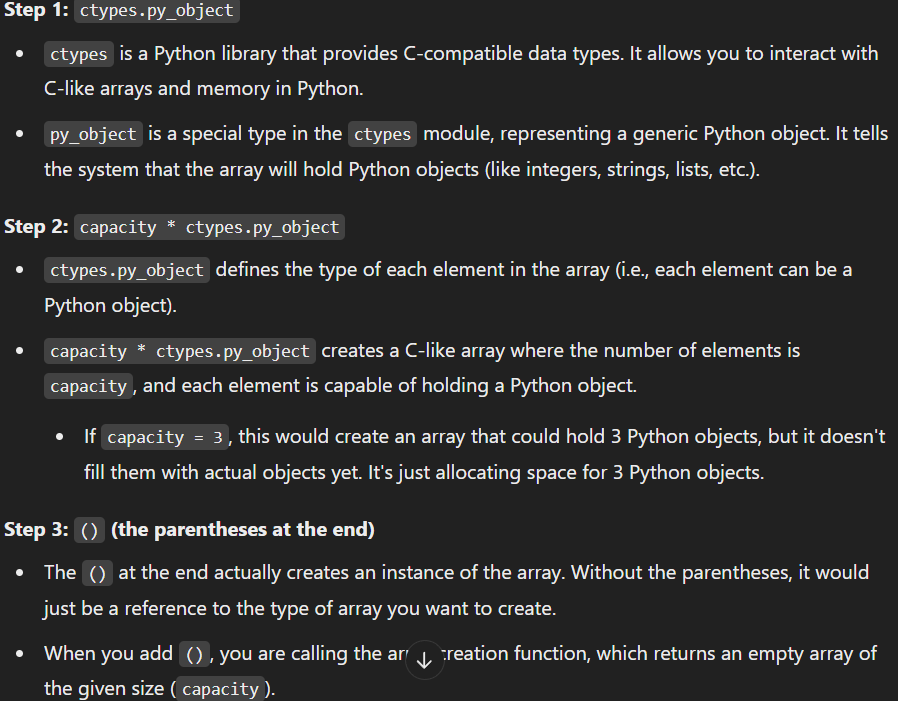
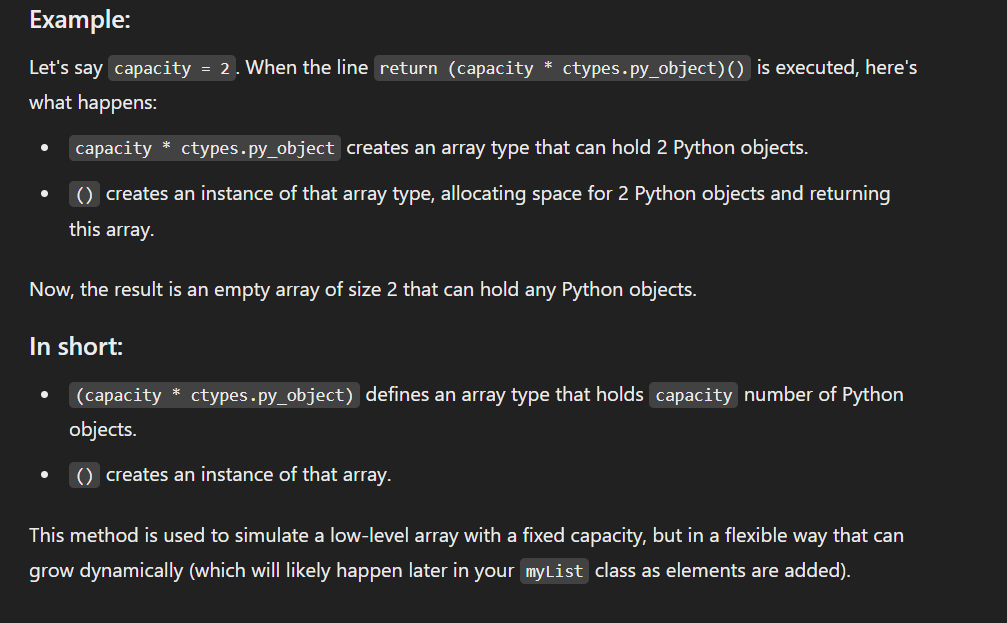